In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
# Importing dataset and examining it
dataset = pd.read_csv('/Users/ayushvarhadi/Desktop/Assignment/Titanic.csv')
print(dataset.head())
print(dataset.shape)
print(dataset.info())
print(dataset.describe())

   Survived  Pclass     Sex   Age     Fare Embarked
0         0       3    male  22.0   7.2500        S
1         1       1  female  38.0  71.2833        C
2         1       3  female  26.0   7.9250        S
3         1       1  female  35.0  53.1000        S
4         0       3    male  35.0   8.0500        S
(712, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   Fare      712 non-null    float64
 5   Embarked  712 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 33.5+ KB
None
         Survived      Pclass         Age        Fare
count  712.000000  712.000000  712.000000  712.000000
mean     0.404494    2.240169   29.642093   34.567251
std      0.491139    0.836854   1

In [3]:
# Converting Categorical features into Numerical features
converter = LabelEncoder()
dataset['Sex'] = converter.fit_transform(dataset['Sex'].astype(str))
print(dataset.head())
print(dataset.info())

   Survived  Pclass  Sex   Age     Fare Embarked
0         0       3    1  22.0   7.2500        S
1         1       1    0  38.0  71.2833        C
2         1       3    0  26.0   7.9250        S
3         1       1    0  35.0  53.1000        S
4         0       3    1  35.0   8.0500        S
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    int64  
 3   Age       712 non-null    float64
 4   Fare      712 non-null    float64
 5   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 33.5+ KB
None


In [7]:
# Dividing dataset into label and feature sets
X = dataset.drop(['Survived', 'Embarked'], axis = 1) # Features
Y = dataset['Survived'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(712, 4)
(712,)


In [8]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

In [9]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

Variance explained by each of the n_components:  [0.43706611 0.28140835]
Total variance explained by the n_components:  0.7184744580583575


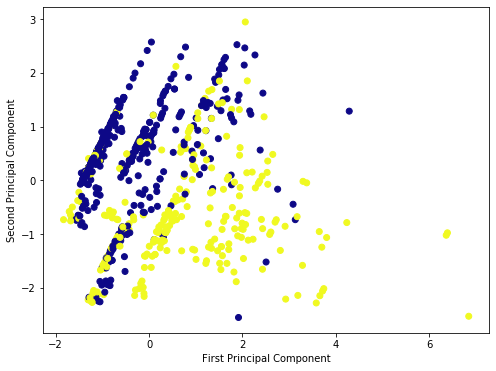

In [10]:
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Cluster Centers: 
 [[ 0.56352173  0.0813058  -0.30160322 -0.35899373]
 [-1.32017532 -0.19047697  0.70657281  0.84102287]]


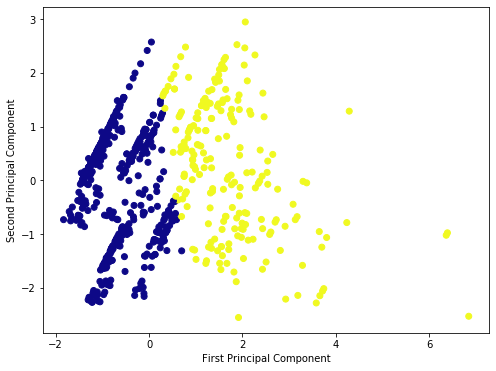

In [12]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


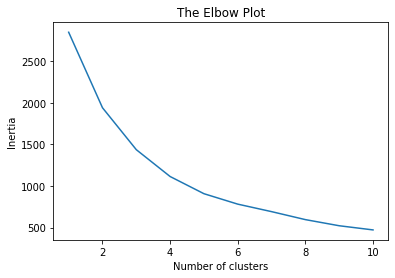

In [13]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


Cluster Centers: 
 [[-1.32017532 -0.19047697  0.70657281  0.84102287]
 [ 0.56352173  0.0813058  -0.30160322 -0.35899373]]


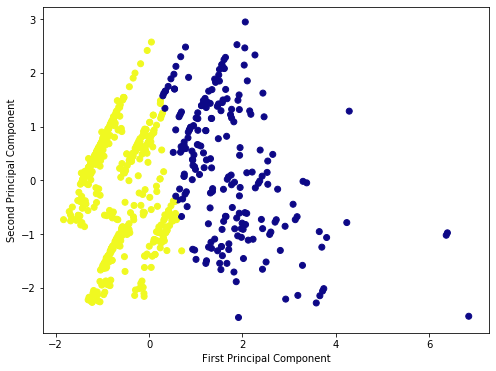

In [16]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = 2)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()
